# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, how= 'right', on= "Mouse ID")
# Display the data table for preview
merged_df =merged_df[['Mouse ID','Timepoint','Tumor Volume (mm3)', 'Metastatic Sites','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
merged_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
mice_nb = merged_df["Mouse ID"].value_counts()
len(mice_nb)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = merged_df.loc[merged_df["Mouse ID"]=="g989",:]
dup_mice_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107     g989          0           45.000000                 0     Propriva   
137     g989          0           45.000000                 0     Propriva   
329     g989          5           48.786801                 0     Propriva   
360     g989          5           47.570392                 0     Propriva   
620     g989         10           51.745156                 0     Propriva   

        Sex  Age_months  Weight (g)  
107  Female          21          26  
137  Female          21          26  
329  Female          21          26  
360  Female          21          26  
620  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df= merged_df[merged_df["Mouse ID"].isin(dup_mice)== False]

cleaned_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_nb2 = cleaned_df["Mouse ID"].value_counts()
len(mice_nb2)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_std = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_sem = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stat_df = pd.DataFrame({"Mean Tumor Volume":regimen_mean,"Median Tumor Volume":regimen_median,"Tumor Volume Variance":regimen_variance,"Tumor Volume Std. Dev.":regimen_std,"Tumor Volume Std. Err.":regimen_sem})
summary_stat_df.head()

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat_agg= cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

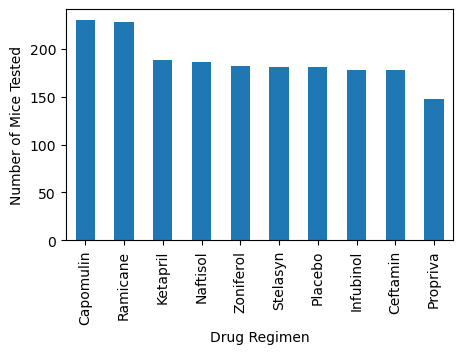

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = cleaned_df["Drug Regimen"].value_counts()
bar_plt = total_mice.plot.bar(figsize = (5,3))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.savefig("Images/Total Mice Pandas.png")
plt.show()

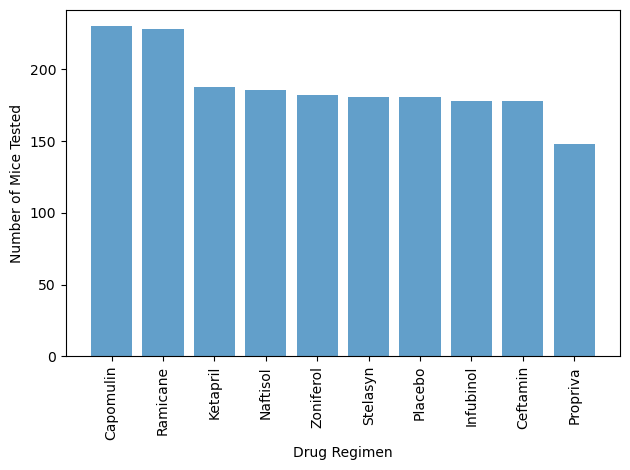

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_mice = cleaned_df["Drug Regimen"].value_counts()
x_axis = total_mice.index.values
y_axis = total_mice.values

plt_bar_pyplot = plt.bar(x_axis, y_axis ,color = "tab:blue", alpha = 0.7, align = "center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = "vertical")
plt.tight_layout()

plt.savefig("Images/Total Mice PyPlot.png")
plt.show()

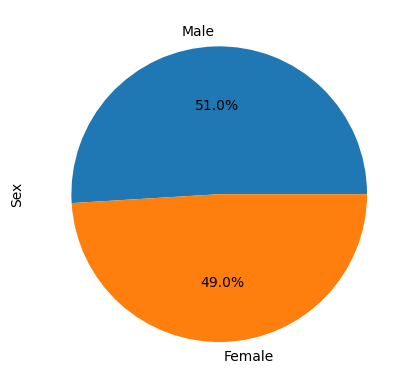

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = cleaned_df["Sex"].value_counts()
plt_pie = gender_df.plot.pie(autopct="%1.1f%%")

plt.savefig("Images/Gender Pandas.png")
plt.show()

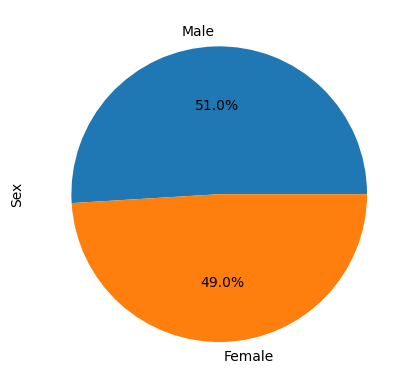

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = cleaned_df["Sex"].value_counts()

labels = ["Female", "Male"]
sizes = [49 , 51]
plot = gender_df.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")

plt.savefig("Images/Gender PyPlot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


last_Timepoint = merged_df.groupby(["Mouse ID"])["Timepoint"].max()
last_Timepoint_df = pd.DataFrame(last_Timepoint)
last_df = pd.merge(merged_df,last_Timepoint_df, on = ("Mouse ID","Timepoint"), how="right")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol =[]

for treatment in treatment_list:
    
    treatment_df = last_df.loc[last_df["Drug Regimen"]== treatment,"Tumor Volume (mm3)"]
    tumor_vol.append(treatment_df)
    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = treatment_df.loc[(treatment_df<lower_bound)|(treatment_df>upper_bound)]
    print(f"{treatment}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


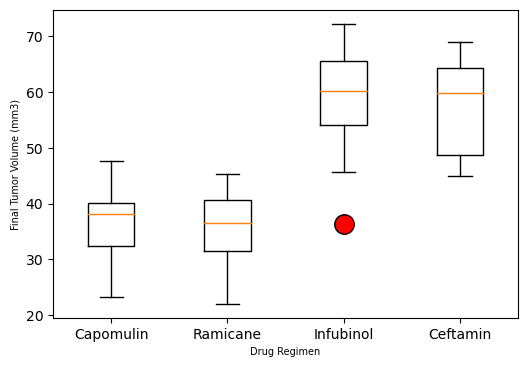

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(6,4))

ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 7)
ax1.set_xlabel('Drug Regimen',fontsize = 7)
ax1.boxplot(tumor_vol, labels=treatment_list, widths = 0.4,flierprops = dict(markerfacecolor = 'red', markersize=14))

plt.savefig("Images/Final Tumor Boxplot.png")
plt.show()

## Line and Scatter Plots

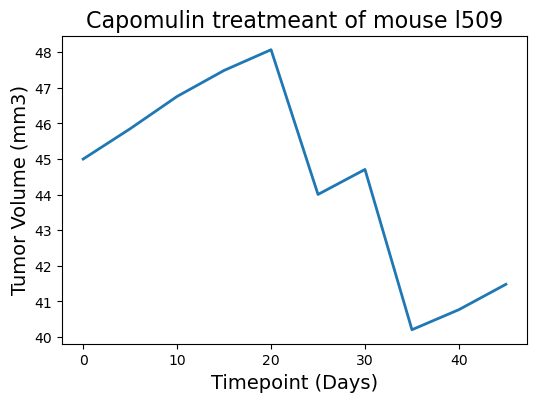

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

# Get data for a specific mouse (e.g. Mouse ID = "s185")
mouce_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
mouce_in_capomulin

# Specify plot parameters
x_axis = mouce_in_capomulin["Timepoint"]
tumor_volume = mouce_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.title("Capomulin treatmeant of mouse l509",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12, label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

plt.savefig("Images/Capomulin Plot.png")
plt.show()

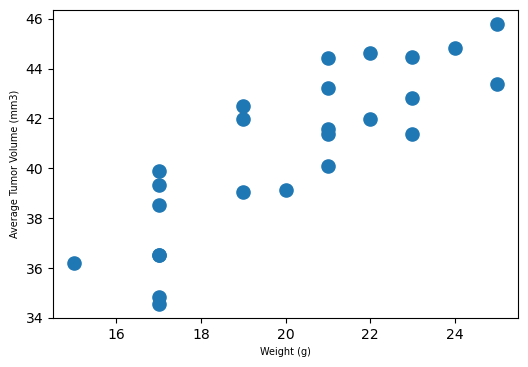

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capom_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(6, 4))
marker_size=14
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90)

plt.xlabel("Weight (g)",fontsize =7)
plt.ylabel("Average Tumor Volume (mm3)",fontsize =7)

plt.savefig("Images/Capomulin Scatter.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


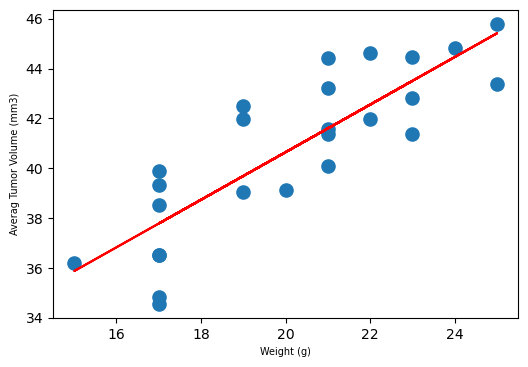

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90)

plt.xlabel("Weight (g)", fontsize = 7)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 7)

x_values = avg_capom_df['Weight (g)']
y_values = avg_capom_df['Tumor Volume (mm3)']

p_slope, p_int, p_r, p_p, p_std_err = linregress(x_values, y_values)
regress_values = x_values * p_slope + p_int
plt.plot(x_values,regress_values,"r-")


plt.savefig("Images/Correlation.png")
plt.show()